In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_final.csv')

In [3]:
data.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,order_item_id,...,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,payment_value,montant_total,recence,frequence
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,delivered,2018-05-10 10:56:27,6.0,10,1.0,...,furniture,1500.0,7.616,5.0,credit_card,8.0,141.90,141.90,160,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,delivered,2018-05-07 11:11:27,3.0,7,1.0,...,health_beauty,375.0,5.148,4.0,credit_card,1.0,27.19,27.19,163,1
2,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,1,delivered,2017-03-10 21:05:03,25.0,27,1.0,...,supply,1500.0,43.750,3.0,credit_card,8.0,86.22,86.22,585,1
3,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,1,delivered,2017-10-12 20:29:41,20.0,31,1.0,...,communication,150.0,1.045,4.0,credit_card,4.0,43.62,43.62,369,1
4,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,1,delivered,2017-11-14 19:45:42,13.0,20,1.0,...,communication,6050.0,0.528,5.0,credit_card,6.0,196.89,196.89,336,1


In [4]:
new_name = {
    'customer_zip_code_prefix': 'zip_code',
    'customer_city': 'city',
    'customer_state': 'state', 
    'order_item_id': 'nb_item', 
    'price' : 'mean_item_price',
    'payment_value' : 'mean_order_price',
}
data = data.rename(columns=new_name)
data.head(2)

,customer_unique_id,zip_code,city,state,order_id,order_status,order_purchase_timestamp,delevery_time,estimated_delevery_time,nb_item,...,product_category_name,product_weight_g,product_volume_dm3,review_score,payment_type,payment_installments,mean_order_price,montant_total,recence,frequence
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,1,delivered,2018-05-10 10:56:27,6.0,10,1.0,...,furniture,1500.0,7.616,5.0,credit_card,8.0,141.90,141.90,160,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,1,delivered,2018-05-07 11:11:27,3.0,7,1.0,...,health_beauty,375.0,5.148,4.0,credit_card,1.0,27.19,27.19,163,1


In [5]:
data.describe()

,zip_code,order_id,delevery_time,estimated_delevery_time,nb_item,mean_item_price,product_weight_g,product_volume_dm3,review_score,payment_installments,mean_order_price,montant_total,recence,frequence
count,96096.000000,96096.000000,93356.000000,96096.000000,95420.000000,93756.000000,93661.000000,94473.000000,95380.000000,96095.000000,95354.000000,96096.000000,96096.000000,96096.000000
mean,35185.761832,1.034809,12.101236,23.383825,1.070615,112.628292,1902.575104,13.779286,4.084696,2.902397,145.962854,190.089231,287.735691,1.034809
std,29801.656868,0.214384,9.553427,8.782161,0.266995,116.045084,3008.339356,17.804109,1.342024,2.678879,145.222015,330.862671,153.414676,0.214384
min,1003.000000,1.000000,0.000000,1.000000,1.000000,9.990000,75.000000,0.352000,1.000000,0.000000,7.300000,0.000000,0.000000,1.000000
25%,11405.000000,1.000000,6.000000,18.000000,1.000000,43.000000,300.000000,2.816000,4.000000,1.000000,60.750000,62.797500,163.000000,1.000000
50%,24440.000000,1.000000,10.000000,23.000000,1.000000,79.000000,700.000000,6.384000,5.000000,2.000000,103.140000,111.610000,268.000000,1.000000
75%,59035.500000,1.000000,15.000000,28.000000,1.000000,139.000000,1800.000000,18.000000,5.000000,4.000000,173.270000,198.402500,397.000000,1.000000
max,99990.000000,17.000000,209.000000,155.000000,11.000000,895.000000,18600.000000,112.896000,5.000000,24.000000,1222.800000,27935.460000,772.000000,17.000000


In [6]:
data.dtypes

customer_unique_id           object
zip_code                      int64
city                         object
state                        object
order_id                      int64
order_status                 object
order_purchase_timestamp     object
delevery_time               float64
estimated_delevery_time       int64
nb_item                     float64
mean_item_price             float64
product_category_name        object
product_weight_g            float64
product_volume_dm3          float64
review_score                float64
payment_type                 object
payment_installments        float64
mean_order_price            float64
montant_total               float64
recence                       int64
frequence                     int64
dtype: object

In [7]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

## Etapes d'analyse de la stabilité temporelle
 
    
    1- Définir un premier modèle de référence basé sur une période de référence (la première année de données ou plus )
    2- Grâce au score ARI, le comparer à des modèles entrainés en ajoutant les données progressivement (période de référence + n mois)
    3- En déduire graphiquement la période de maintenance
    4- Refaire une simulation avec période de référence = date_dernier_achat - période de maintenance


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

#### Variables utilisées : 

  - review_score
  - mean_order_price
  - recence
  - frequence


In [9]:
# Sélection des variables :
cols_cluster = ['order_purchase_timestamp', 'review_score', 'mean_order_price', 'recence', 'frequence']
df = data[cols_cluster]

In [10]:
sorted_df = df.sort_values(by = "order_purchase_timestamp")

In [11]:
sorted_df.dropna(inplace=True)
sorted_df.shape

(94645, 5)

In [12]:
sorted_df = sorted_df.reset_index(drop=True)
sorted_df

,order_purchase_timestamp,review_score,mean_order_price,recence,frequence
0,2016-09-04 21:15:19,1.0,136.23,772,1
1,2016-09-05 00:15:34,1.0,75.06,772,1
2,2016-09-13 15:24:19,1.0,40.95,764,1
3,2016-10-02 22:07:52,1.0,109.34,744,1
4,2016-10-03 16:56:50,4.0,39.09,744,1
...,...,...,...,...,...
94640,2018-09-29 09:13:03,1.0,137.03,18,1
94641,2018-10-01 15:30:09,2.0,80.38,16,2
94642,2018-10-03 18:55:29,1.0,197.55,13,3
94643,2018-10-16 20:16:02,5.0,222.03,0,2


In [13]:
# On sélectionne les données de la période de référence (1an et 6 mois)

start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)

reference_df = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date)]

In [14]:
# On re-calcule la récence :

reference_df['recence_maj'] = (reference_df.order_purchase_timestamp.max() - reference_df.order_purchase_timestamp).dt.days

In [16]:
reference_df = reference_df[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
reference_df.head(5)

,review_score,mean_order_price,recence_maj,frequence
0,1.0,136.23,545,1
1,1.0,75.06,545,1
2,1.0,40.95,537,1
3,1.0,109.34,517,1
4,4.0,39.09,517,1


In [17]:
# Standardisation des données

scaler = StandardScaler()
df_scaled = scaler.fit_transform(reference_df)
df_scaled = pd.DataFrame(df_scaled, columns=reference_df.columns)

##  Modèle k-means

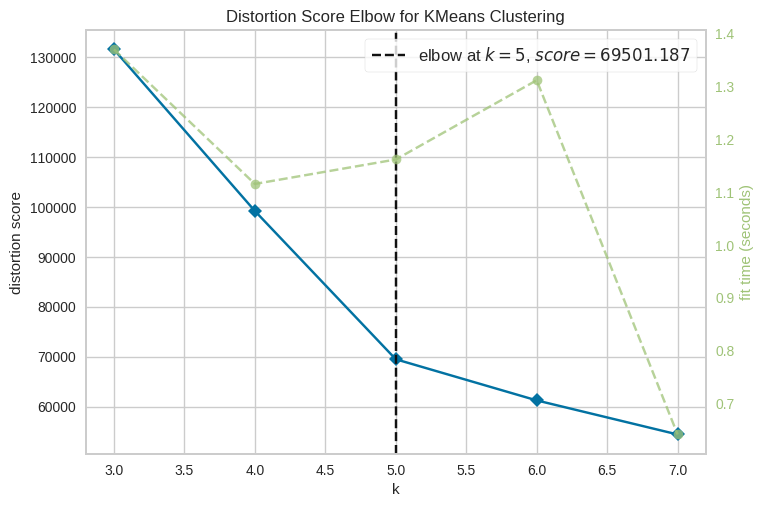

In [18]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=21)
visualizer = KElbowVisualizer(model, k=(3,8))

visualizer.fit(df_scaled)        
visualizer.show()      

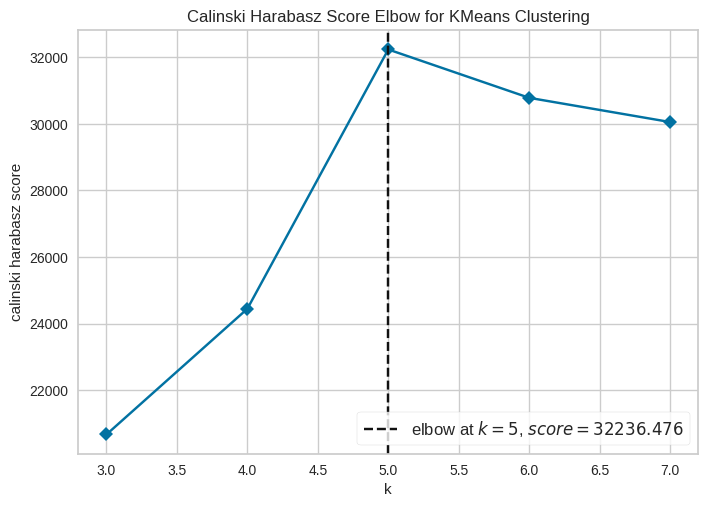

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans(init='k-means++', random_state=21)
visualizer = KElbowVisualizer(
    model, k=(3,8), metric='calinski_harabasz', timings=False
)

visualizer.fit(df_scaled)       
visualizer.show()        

Modèle de référence : 
KMeans(n_clusters=5, init='k-means++', random_state=21)

## Première simulation : 
  ### Période de référence : 1 an, 6 mois

In [20]:
# Exemple test
start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)
for i in range(2):
    end_date_choix = end_date + pd.DateOffset(months = i)
    def_choix = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date_choix)]
    print(def_choix.shape)
    print(def_choix)

(56814, 5)
      order_purchase_timestamp  review_score  mean_order_price  recence  \
0          2016-09-04 21:15:19           1.0            136.23      772   
1          2016-09-05 00:15:34           1.0             75.06      772   
2          2016-09-13 15:24:19           1.0             40.95      764   
3          2016-10-02 22:07:52           1.0            109.34      744   
4          2016-10-03 16:56:50           4.0             39.09      744   
...                        ...           ...               ...      ...   
56809      2018-03-04 21:00:45           5.0             78.80      226   
56810      2018-03-04 21:03:07           3.0            142.02      226   
56811      2018-03-04 21:04:35           5.0             56.10      226   
56812      2018-03-04 21:08:28           4.0            157.20      226   
56813      2018-03-04 21:13:20           3.0            133.13      226   

       frequence  
0              1  
1              1  
2              1  
3           

In [21]:
# On sélectionne les données de la période de référence (1an et 6 mois)
start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)

X_ref = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date)]
# On re-calcule la récence
X_ref['recence_maj'] = (X_ref.order_purchase_timestamp.max() - X_ref.order_purchase_timestamp).dt.days
X_ref = X_ref[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]

# On sauvegarde le scaler.fit des données de référence
scaler_ref = StandardScaler().fit(X_ref)
X_ref_scaled = scaler_ref.transform(X_ref)

# On sauvegarde le modèle.fit de référence
model_ref = KMeans(n_clusters = 5, init='k-means++', random_state=21)
model_ref_fit = model_ref.fit(X_ref_scaled)


### Test n°1 : Période de 1 mois

 - Nous allons ajouter une période de 1 mois à chaque itération et comparer les prédictions du modèle de référence avec les prédictions du modèle entrainée sur toute la periode. 
 - Nous utiliserons l'ARI pour comparer ces prédictions, la période de maintenance sera la période au bout de laquelle ARI<0.8

In [22]:
from sklearn.metrics.cluster import adjusted_rand_score


start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)

list_ari = []

for i in range(6):
# Ajouter un mois au dateset de référence
    end_date_choix = end_date + pd.DateOffset(months = i)
    
    df_period = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date_choix)]
# On re-calcule la récence
    df_period['recence_maj'] = (df_period.order_purchase_timestamp.max() - df_period.order_purchase_timestamp).dt.days
    X = df_period[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
    
# Scaler et modèle de référence    
# Standardisation en utilisant le scaler de référence
    X_scaled = scaler_ref.transform(X)
# Prédiction avec le modèle déjà entraîné
    y_ref_predict = model_ref_fit.predict(X_scaled)

# Nouveau scaler et nouveau modèle
    scaler = StandardScaler()
    X_re_scaled = scaler.fit_transform(X)
# Prédiction avec un modèle ré-entraîné
    model = KMeans(n_clusters = 5, init='k-means++', random_state=21).fit(X_re_scaled)
    y_fit_predict = model.predict(X_re_scaled)

# Calcul de l'ARI : Indice de rang ajusté
    ARI = adjusted_rand_score(y_ref_predict,y_fit_predict)
    list_ari.append(ARI)

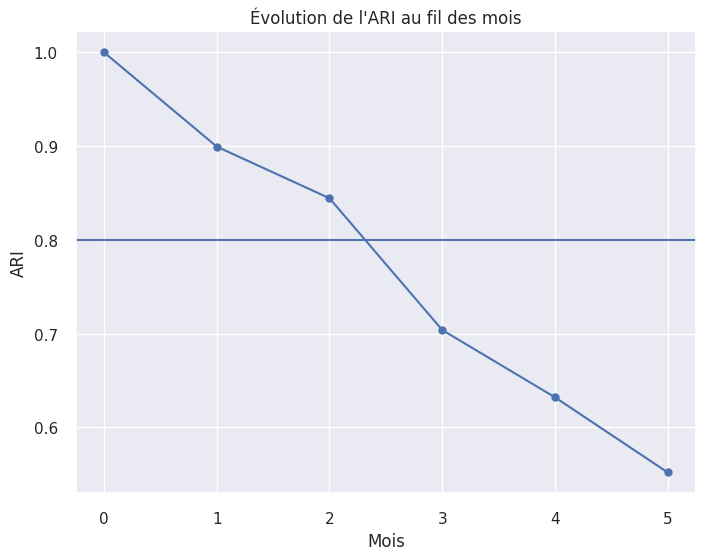

In [23]:
sns.set()
# Liste des mois
month = list(range(6))

# Représentation graphique de l'évolution de l'ARI
plt.figure(figsize=(8, 6))
plt.plot(month, list_ari, marker='o', linestyle='-', color='b')
plt.title('Évolution de l\'ARI au fil des mois')
plt.xlabel('Mois')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.grid(True)
plt.show()

 - On remarque que le score ARI passe en dessous de 0.8 au bout de 2 mois
 - Cela indique que la période de maintenance est légèrement supérieure à 2 mois

Nous allons affiner l'analyse en ajoutant 2 semaine à la période de référence au lieu de 1 mois

### Test n°2 : période de 15 jours
 - Ici, nous ajoutons 2 semaines à la periode de référence à chaque itération

In [24]:
start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)

list_ari_2 = []

for i in range(15):
# Ajouter 2 semaines au dateset de référence
    end_date_choix = end_date + pd.DateOffset(weeks = 2*i)
    
    df_period = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date_choix)]
    
# On re-calcule la récence
    df_period['recence_maj'] = (df_period.order_purchase_timestamp.max() - df_period.order_purchase_timestamp).dt.days
    X = df_period[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
    
# Scaler et modèle de référence   
# Standardisation en utilisant le scaler de référence
    X_scaled = scaler_ref.transform(X)
    
# Prédiction avec le modèle déjà entraîné
    y_ref_predict = model_ref_fit.predict(X_scaled)

# Nouveau scaler et nouveau modèle
    scaler = StandardScaler()
    X_re_scaled = scaler.fit_transform(X)
# Prédiction avec un modèle ré-entraîné
    model = KMeans(n_clusters = 5, init='k-means++', random_state=21).fit(X_re_scaled)
    y_fit_predict = model.predict(X_re_scaled)

# Calcul de l'ARI : Indice de rang ajusté
    ARI_2 = adjusted_rand_score(y_ref_predict,y_fit_predict)
    list_ari_2.append(ARI_2)

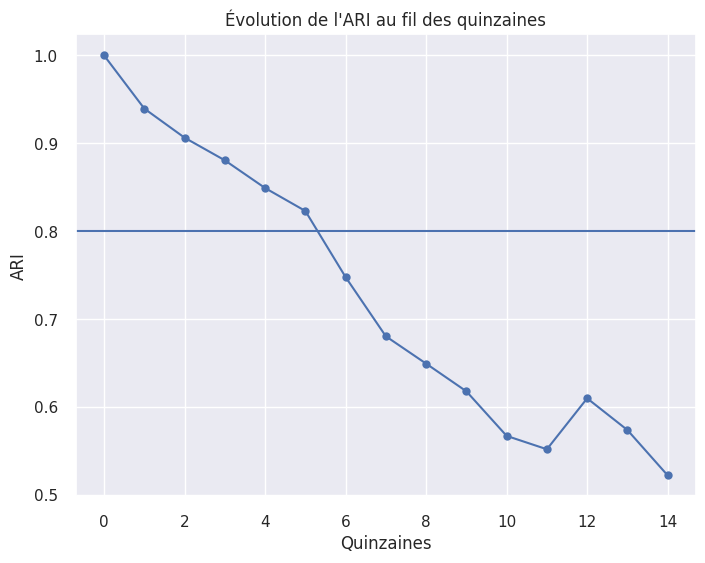

In [25]:
# Liste des quinzaines
period = list(range(15))

# Représentation graphique de l'évolution de l'ARI
plt.figure(figsize=(8, 6))
plt.plot(period, list_ari_2, marker='o', linestyle='-', color='b')
plt.title('Évolution de l\'ARI au fil des quinzaines')
plt.xlabel('Quinzaines')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.grid(True)
plt.show()

 - Ici, chaque point représente 2 semaines
 - Nous constatons globalement une baisse de l'ARI au fils des semaines, avec une légère hause entre 11 et 12 quinzaines.
 - Le graphique indique que la periode de maintenance est située entre 5 et 6 quinzaines (donc entre 10 et 12 semaines)
 
Affinons la simulation en ajoutant une semaine à chaque itération à la periode de référence

### Test n°1 : période de 7 jours

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score

start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 6)

list_ari_3 = []

for i in range(30):
# Ajouter une semaine au dateset de référence
    end_date_choix = end_date + pd.DateOffset(weeks = i)
    
    df_period = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date_choix)]
    
# On re-calcule la récence
    df_period['recence_maj'] = (df_period.order_purchase_timestamp.max() - df_period.order_purchase_timestamp).dt.days
    X = df_period[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
    
# Scaler et modèle de référence    
# Standardisation en utilisant le scaler de référence
    X_scaled = scaler_ref.transform(X)
    
# Prédiction avec le modèle déjà entraîné
    y_ref_predict = model_ref_fit.predict(X_scaled)

# Nouveau scaler et nouveau modèle
    scaler = StandardScaler()
    X_re_scaled = scaler.fit_transform(X)
# Prédiction avec un modèle ré-entraîné
    model = KMeans(n_clusters = 5, init='k-means++', random_state=21).fit(X_re_scaled)
    y_fit_predict = model.predict(X_re_scaled)

# Calcul de l'ARI : Indice de rang ajusté
    ARI_3 = adjusted_rand_score(y_ref_predict,y_fit_predict)
    list_ari_3.append(ARI_3)

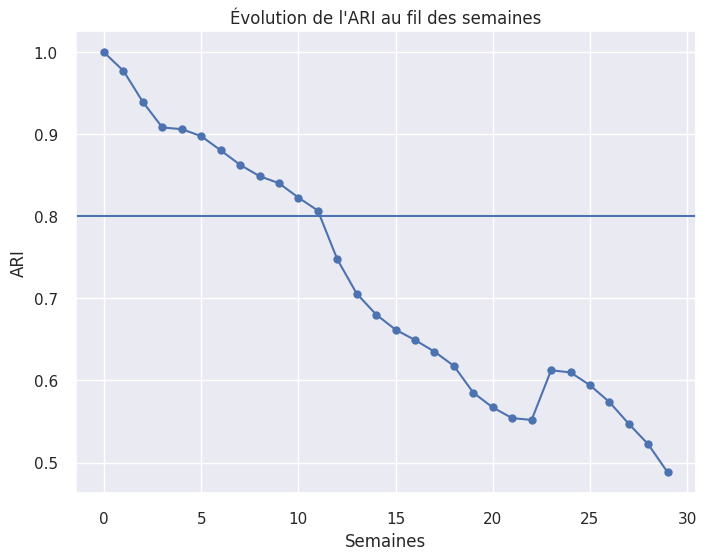

In [27]:
# Liste des semaines
week = list(range(30))

# Représentation graphique de l'évolution de l'ARI
plt.figure(figsize=(8, 6))
plt.plot(week, list_ari_3, marker='o', linestyle='-', color='b')
plt.title('Évolution de l\'ARI au fil des semaines')
plt.xlabel('Semaines')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.grid(True)
plt.show()

 - Ici, chaque point représente une semaine
 - Nous retrouvons la légère hausse de l'ARI au bout de 23 semaines. Mais globalement, l'ARI diminue au fil des semaines.
 - Le graphique montre que l'ARI passe en dessous de 0.8 au bout de 11 semaines.
 - Nous pouvons fixer la période de maintenance à 11 semaines.

## Deuxième simulation : 
  ### Période de référence : 1 an, 10 mois

 - Suite à la simulation précédente, la periode de maintenance est de 9 semaines.
 - Nous allons augmenter la periode de référence initialment fixée à 1an et 6 mois

In [28]:
# On sélectionne les données de la période de référence (1an et 10 mois)
start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 10)

X_ref_2 = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] < end_date)]

# On re-calcule la récence
X_ref_2['recence_maj'] = (X_ref_2.order_purchase_timestamp.max() - X_ref_2.order_purchase_timestamp).dt.days

# On sauvegarde le scaler.fit des données de référence
X_ref_2 = X_ref_2[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
scaler_ref_2 = StandardScaler().fit(X_ref_2)
X_ref_scaled_2 = scaler_ref_2.transform(X_ref_2)

# On sauvegarde le modèle.fit de référence
model_ref_2 = KMeans(n_clusters = 5, init='k-means++', random_state=21)
model_ref_fit_2 = model_ref_2.fit(X_ref_scaled_2)


In [29]:
from sklearn.metrics.cluster import adjusted_rand_score

start_date = sorted_df['order_purchase_timestamp'].min()
end_date = start_date + pd.DateOffset(years=1, months = 10)

list_ari_4 = []

for i in range(15):
# Ajouter une semaine au dateset de référence
    end_date_choix = end_date + pd.DateOffset(weeks = i)
    
    df_period_2 = sorted_df.loc[(sorted_df['order_purchase_timestamp'] >= start_date) & 
                              (sorted_df['order_purchase_timestamp'] <= end_date_choix)]
    
# On re-calcule la récence
    df_period_2['recence_maj'] = (df_period_2.order_purchase_timestamp.max() - df_period_2.order_purchase_timestamp).dt.days
    X_2 = df_period_2[['review_score', 'mean_order_price', 'recence_maj', 'frequence']]
    
# Scaler et modèle de référence    
# Standardisation en utilisant le scaler de référence
    X_scaled_2 = scaler_ref_2.transform(X_2)
    
# Prédiction avec le modèle déjà entraîné
    y_ref_predict_2 = model_ref_fit_2.predict(X_scaled_2)

# Nouveau scaler et nouveau modèle
    scaler_2 = StandardScaler()
    X_re_scaled_2 = scaler_2.fit_transform(X_2)
    
# Prédiction avec un modèle ré-entraîné
    model_2 = KMeans(n_clusters = 5, init='k-means++', random_state=21).fit(X_re_scaled_2)
    y_fit_predict_2 = model_2.predict(X_re_scaled_2)

# Calcul de l'ARI : Indice de rang ajusté
    ARI_4 = adjusted_rand_score(y_ref_predict_2,y_fit_predict_2)
    list_ari_4.append(ARI_4)

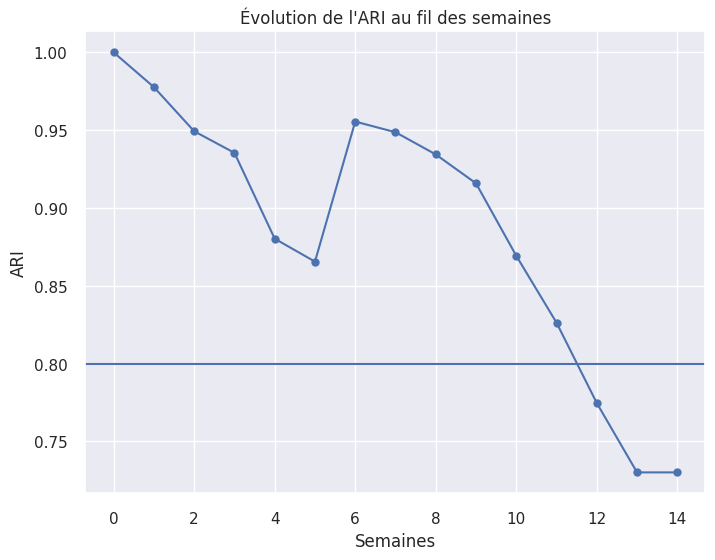

In [30]:
# Liste des semaines
weeks = list(range(15))

# Représentation graphique de l'évolution de l'ARI
plt.figure(figsize=(8, 6))
plt.plot(weeks, list_ari_4, marker='o', linestyle='-', color='b')
plt.title('Évolution de l\'ARI au fil des semaines')
plt.xlabel('Semaines')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.grid(True)
plt.show()

  - Nous remarquons que l'ARI diminue entre 1 et 5 semaine puis augmente avant de diminuer à nouveau. 
  - La periode de maintenace conseillée est de 11 semaines.